In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier

In [69]:
with open("seismic-bumps.csv") as file:
    data = pd.read_csv(file, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [70]:
enum_ad = {
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4
}
def str_to_float(char: str) -> float:
    return enum_ad[char]

In [71]:
diabetes_X, diabetes_y = data.iloc[:, 0:17], np.array(data.iloc[:, 18])

diabetes_X[0] = diabetes_X[0].apply(str_to_float)
diabetes_X[1] = diabetes_X[1].apply(str_to_float)
diabetes_X[2] = diabetes_X[2].apply(lambda x: 1 if x == "N" else 0)
diabetes_X[7] = diabetes_X[7].apply(str_to_float)

diabetes_X.head()
diabetes_X = np.array(diabetes_X)

In [72]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(diabetes_X)

scaled_df[:20]

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 5.80994394e-03,
        1.01860053e-02, 1.78970917e-02, 2.56959315e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 5.63271754e-03,
        6.86448184e-03, 1.93885160e-02, 1.82012848e-02, 0.00000000e+00,
        1.11111111e-01, 0.00000000e+00, 1.42857143e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.97512438e-03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.06293464e-03,
        6.20017715e-03, 1.11856823e-02, 1.92719486e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.106

In [73]:
# Split the data into training/testing sets
diabetes_X_train = scaled_df[:-100]
diabetes_X_test = scaled_df[-100:]
diabetes_y_train = diabetes_y[:-100]
diabetes_y_test = diabetes_y[-100:]

In [74]:
learning_rates = [x * 0.01 for x in range(1,90,20)]
alphas = [x * 0.01 for x in range(1,90, 20)]
optimizers = ['lbfgs', 'sgd', 'adam']
results = {'lbfgs': [], 'sgd': [], 'adam': []}
for opt in optimizers:
    for lr in learning_rates:
        for alpha in alphas:
            mlp = MLPClassifier(alpha = alpha, learning_rate_init = lr, solver=opt)
            mlp.fit(diabetes_X_train, diabetes_y_train)
            score = mlp.score(diabetes_X_test, diabetes_y_test)
            results[opt].append({'learning_rate': lr, 'alpha': alpha, 'score': score})
results

C:\Users\Ved\AppData\Local\pypoetry\Cache\virtualenvs\ml-course-ru-LtUHDCLA-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ved\AppData\Local\pypoetry\Cache\virtualenvs\ml-course-ru-LtUHDCLA-py3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ved\AppData\Local\pypoetry\Cache\virtualenvs\ml-cou

KeyboardInterrupt: 

In [ ]:
for i, name in enumerate(optimizers):
    print(optimizers[i])
    ax = plt.subplot(1, 3, i+1, projection='3d')
    ax.set_title(name)
    ds = pd.DataFrame(results[name])
    print(ds.sort_values('score', ascending=False).head())
    ax.plot_trisurf(ds['learning_rate'], ds['alpha'], ds['score'], cmap='viridis', edgecolor='none');
plt.show()

In [84]:
learning_rates = [x * 0.01 for x in range(1,90,10)]
alphas = [x * 0.01 for x in range(1,900, 20)]
penalties = ['l2','l1','elasticnet']
results = {'l2': [], 'l1': [], 'elasticnet': []}
for pnlt in penalties:
    for lr in learning_rates:
        for alpha in alphas:
            mlp = Perceptron(alpha = alpha, l1_ratio = lr, penalty=pnlt)
            mlp.fit(diabetes_X_train, diabetes_y_train)
            score = mlp.score(diabetes_X_test, diabetes_y_test)
            results[pnlt].append({'l1_ratio': lr, 'alpha': alpha, 'score': score})
results

{'l2': [{'l1_ratio': 0.01, 'alpha': 0.01, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 0.21, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 0.41000000000000003, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 0.61, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 0.81, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 1.01, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 1.21, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 1.41, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 1.61, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 1.81, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 2.0100000000000002, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 2.21, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 2.41, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 2.61, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 2.81, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 3.0100000000000002, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 3.21, 'score': 0.96},
  {'l1_ratio': 0.01, 'alpha': 3.41, 'score': 0.96},
  {'l1_ratio': 

l2
     l1_ratio  alpha  score
0        0.01   0.01   0.96
267      0.51   8.41   0.96
277      0.61   1.41   0.96
276      0.61   1.21   0.96
275      0.61   1.01   0.96
l1
     l1_ratio  alpha  score
0        0.01   0.01   0.96
267      0.51   8.41   0.96
277      0.61   1.41   0.96
276      0.61   1.21   0.96
275      0.61   1.01   0.96
elasticnet
     l1_ratio  alpha  score
202      0.41   4.41   0.96
266      0.51   8.21   0.96
276      0.61   1.21   0.96
275      0.61   1.01   0.96
274      0.61   0.81   0.96


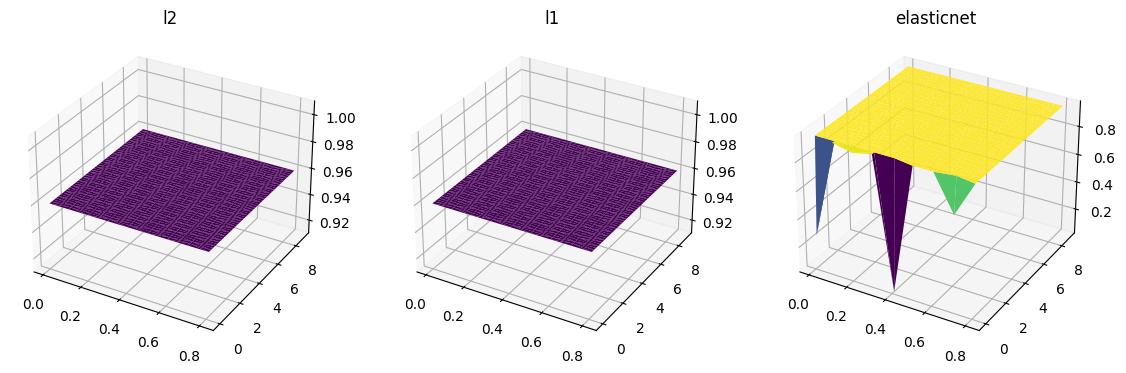

In [86]:
plt.figure(figsize=(14, 5))
for i, name in enumerate(penalties):
    print(penalties[i])
    ax = plt.subplot(1, 3, i+1, projection='3d')
    ax.set_title(name)
    ds = pd.DataFrame(results[name])
    print(ds.sort_values('score', ascending=False).head())
    ax.plot_trisurf(ds['l1_ratio'], ds['alpha'], ds['score'], cmap='viridis', edgecolor='none');
plt.show()